# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 4/29/2023
* Student Name: Victor Teelucksingh
* Student Net ID: vat5jy
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: 

# The Monte Carlo Module

In [ ]:
# A code block with your classes.
import pandas as pd
import numpy as np
import random

class Die:
    """
    A class to represent a Die in a Monte Carlo simulator

    ...

    Attributes
    ----------
    faces : array (dtype string or numeric)
        Array of die faces
    weights : array (dtype numeric)
        Array of weights associated with each face
    __df : dataframe 
        Private dataframe built from faces and weights arrays

    Methods
    -------
    change_weight(face_value, new_weight):
        Changes the weight of a single side.
    roll(num_rolls=1):
        Rolls the die one or more times.
    show_current():
        Shows the user the die's current set of faces and weights.
    """
    def __init__(self, faces):
        """
        Constructs all the necessary attributes for the Die object.

        INPUTS:
        faces : array (dtype string or numeric)
        """
        self.faces = faces
        self.weights = np.tile(1,len(faces))
        self.__df= pd.DataFrame({'faces':faces, 'weights':self.weights})


    def change_weight(self, face_value, new_weight):
        '''
        PURPOSE: This method changes the weight of a single side.
    
        INPUTS: 
        face_value str or numeric
        new_weight numeric 
    
        OUTPUT:
        Updates weight value to new weight in weights array attribute for a given face.
        Updates weight value to new weight in faces & weights dataframe attribute for a given face.
        Returns error message for invalid face or weight.
        '''
        #Check to see if weight passed is valid
        error_message = None
        try:
            a = float(new_weight)
        except ValueError:
                error_message = "Not a valid weight. Try again"
                return error_message

        #Check to see if face passed is valid
        if (face_value in self.faces):
            i, = np.where(self.faces == face_value)
            my_index = i[0]
            self.__df.loc[my_index,'weights'] = new_weight
            self.weights[my_index] = new_weight
        else:
            error_message = "Please choose a valid face value."
            return error_message

    def roll(self, num_rolls = 1):
        '''
        PURPOSE: This method rolls the die one or more times.
    
        INPUTS: 
        num_rolls int 
    
        OUTPUT:
        Returns a random sample from the vector of faces according to the weights with specified length.
        '''
        randomList = random.choices(self.faces, self.weights, k=num_rolls)
        return randomList

    def show_current(self):
        '''
        PURPOSE: This method shows the user the die's current set of faces and weights.
    
        INPUTS: 
        None
    
        OUTPUT:
        Dataframe
        '''
        return self.__df
    
    
class Game:
    """
    A class to represent a Game in a Monte Carlo simulator

    ...

    Attributes
    ----------
    DieList : list
        List of already instantiated similar Die objects
    __game_df : dataframe
        Private dataframe of shape N rolls by M dice
    game_df_wide : dataframe
        Game results in wide form as an attribute.
    game_df_narrow : dataframe
        Game results in narrow form as an attribute.

    Methods
    -------
    play(num_plays):
        Plays a game (i.e., rolls all of the dice a given number of times)
    show(form='wide')
        Shows the user the results of the most recent play in narrow or wide form.
    """
    def __init__(self, DieList):
        """
        Constructs all the necessary attributes for the Game object.

        INPUTS:
        DieList : list of already instantiated similar Die objects
        """
        self.DieList = DieList

    def play(self, num_plays):
        '''
        PURPOSE: This method plays a game (i.e., rolls all of the dice a given number of times)
    
        INPUTS: 
        num_plays int
    
        OUTPUT:
        Saves results to a private dataframe of shape N rolls by M dice
        '''
        self.__game_df = pd.DataFrame()
        i = 1

        #Build matrix of shape N rolls by M dice
        for c in self.DieList:
            i_str = str(i)
            self.__game_df['Die ' + i_str] = c.roll(num_plays)
            i = i+1

        #Build roll # column and set as index
        game_roll_list = list(range(1,len(self.__game_df['Die 1'])+1))
        self.__game_df['roll #'] = game_roll_list
        self.__game_df = self.__game_df.set_index('roll #')

    def show(self, form = 'wide'):
        '''
        PURPOSE: This method shows the user the results of the most recent play. 
        It passes the private dataframe created in the play method to the user.
    
        INPUTS: 
        form str
    
        OUTPUT:
        Returns a dataframe in narrow or wide form depending on chosen parameter.
        Also creates public attributes for wide and narrow dataframes. 
        '''
        #Build wide and narrow forms as attributes. Return one or the other depending on parameter chosen by user.
        self.game_df_wide = self.__game_df
        self.game_df_narrow = self.game_df_wide.stack()
        if form.lower() == 'wide':
            return self.game_df_wide
        elif form.lower() == 'narrow':
            return self.game_df_narrow
        else:
            return "Not a valid form. Try again."


class Analyzer:
    """
    A class to analyze the results of a single game and compute various descriptive statistics in a Monte Carlo simulator

    ...

    Attributes
    ----------
    Game : Game object
        Already instantiated Game object
    types : str
        String identifying if faces are in string or numeric format
    jackpot_results  : dataframe (Boolean)
        Stored dataframe of jackpot results
    combo_results_sort : dataframe
        Stored dataframe of sorted combo results (wide form)
    combo_results_index : dataframe
        Stored dataframe of sorted combo results (narrow form, multi-columned index)
    face_counts_per_roll_results : dataframe
        Stored dataframe of face counts per roll results (wide form)

    Methods
    -------
    jackpot():
        Computes how many times the game resulted in all faces being identical.
    combo():
        Computes the distinct combinations of faces rolled, along with their counts for a Game.
    face_counts_per_roll():
        Computes how many times a given face is rolled in each event for a Game.
    """
    def __init__(self, Game):
        """
        Constructs all the necessary attributes for the Analyzer object.

        INPUTS:
        Game : Game object
        """
        self.Game = Game
        self.types = None
        
        #Infer the data type of the die faces used. 
        for c in Game.DieList[0].faces:
            if isinstance(c,str):
                self.types = "string"
        if self.types != "string":
            self.types = "numeric"

    def jackpot(self):
        '''
        PURPOSE: This method computes how many times the game resulted in all faces being identical.
    
        INPUTS: 
        None
    
        OUTPUT:
        Returns an integer for the number of times to the user
        '''
        #Check all columns against the first column using eq. 
        #Create a boolean dataframe where True indicates Jackpot and False indicates No Jackpot for each roll.
        self.jackpot_results = self.Game.game_df_wide.eq(self.Game.game_df_wide.iloc[:,0],axis=0).all(1)
        true_count = len(self.jackpot_results[self.jackpot_results == True])
        return true_count
    
    def combo(self):
        '''
        PURPOSE: This method computes the distinct combinations of faces rolled, along with their counts for a Game.
    
        INPUTS: 
        None
    
        OUTPUT:
        Stores the results as a dataframe in a public attribute. 
        '''
        #Group and get value counts
        combo_results = self.Game.game_df_wide.groupby(list(self.Game.game_df_wide.columns.values), as_index=False).value_counts()
        col_list = list(combo_results.columns.values)
        #sort and set multi-index
        self.combo_results_sort = combo_results.sort_values(by=['count'], ascending=False)
        self.combo_results_index = self.combo_results_sort.set_index(col_list[:-1])

    def face_counts_per_roll(self):
        '''
        PURPOSE: This method computes how many times a given face is rolled in each event for a Game. 
    
        INPUTS: 
        None
    
        OUTPUT:
        Stores the results as a dataframe in a public attribute.
        '''
        #Apply value_counts() to each row of the wide view game
        face_counts_per_roll_results_1 = self.Game.game_df_wide.apply(pd.value_counts, axis=1)
        self.face_counts_per_roll_results = face_counts_per_roll_results_1.replace(np.nan,0)


# Test Module

In [ ]:
# A code block with your test code.
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import numpy as np
import unittest

class DieTestSuite(unittest.TestCase):
    """
    Tests methods in the Die class in a Monte Carlo simulator. 
    """
    def test_1_change_weight(self):
        """
        Test a valid weight change for a valid face.
        """ 
        test_1_object = Die(np.array(['one','two','three','four','five','six']))
        test_1_object.change_weight("one", 100)
        
        self.assertTrue((test_1_object.df.loc[test_1_object.df['faces'] == 'one', 'weights'].iloc[0])==100)

    def test_2_change_weight(self):
        """
        Test an invalid weight change for a valid face.
        """  
        test_2_object = Die(np.array(['one','two','three','four','five','six']))

        self.assertTrue(test_2_object.change_weight("one", 'one hundred') == "Not a valid weight. Try again")

    def test_3_change_weight(self): 
        """
        Test a valid weight change for a invalid face.
        """  
        test_3_object = Die(np.array(['one','two','three','four','five','six']))

        self.assertTrue(test_3_object.change_weight("seven", 100) == "Please choose a valid face value.")

    def test_4_roll(self):
        """
        Test length of returned list equals number of rolls specified.
        """
        test_4_object = Die(np.array(['one','two','three','four','five','six']))
        
        self.assertTrue(len(test_4_object.roll(num_rolls=10))==10)

    def test_5_roll(self):
        """
        Test that all faces in randomized roll list are a subset of the initialized faces array.
        """
        test_5_object = Die(np.array(['one','two','three','four','five','six']))
        test_5_list = test_5_object.roll(num_rolls=10)
        test_5_faces_list = list(test_5_object.faces)
        self.assertTrue(set(test_5_list).issubset(set(test_5_faces_list)))

    def test_6_show_current(self):
        """
        Test of show_current method returns the df dataframe attribute as specified.
        """        
        test_6_object = Die(np.array(['one','two','three','four','five','six']))
        
        self.assertTrue(test_6_object.show_current().equals(test_6_object.df))

    def test_7_show_current(self):
        """
        Test if show_current method correctly returns the updated df dataframe attribute after a weight change.
        """     
        test_7_object = Die(np.array(['one','two','three','four','five','six']))
        test_7_object.change_weight("one", 100)

        self.assertTrue(test_7_object.show_current().equals(test_7_object.df))

class GameTestSuite(unittest.TestCase):
    """
    Tests methods in the Game class in a Monte Carlo simulator. 
    """
    def test_8_play(self):
        """
        Test if private dataframe created is of shape N rolls by M dice.
        The public attribute for the wide dataframe created in the show method is equivalent to the private dataframe created in the play method.
        It is sufficient to perform this test using this public attribute. 
        """  
        test_8_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_8_object.play(8)
        test_8_object.show(form='wide')
        self.assertTrue(test_8_object.game_df_wide.shape == (8,2))

    def test_9_play(self):
        """
        Test all values in private dataframe exist in the Die faces list.
        The public attribute for the wide dataframe created in the show method is equivalent to the private dataframe created in the play method.
        It is sufficient to perform this test using this public attribute. 
        """  
        test_9_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_9_object.play(8)
        test_9_object.show(form='wide')        
        
        test_9_list = test_9_object.game_df_wide.stack().tolist()
        test_9_faces_list = ['one','two','three','four','five','six']
        self.assertTrue(set(test_9_list).issubset(set(test_9_faces_list)))

    def test_10_show(self):
        """
        Test if show method returns error message if invalid form is passed as parameter.
        """   
        test_10_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_10_object.play(8)
        
        self.assertTrue(test_10_object.show(form='invalid')=="Not a valid form. Try again.")            

    def test_11_show(self):
        """
        Test expected dimensions of wide form.
        """ 
        test_11_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_11_object.play(8)
        test_11_object.show(form = 'wide')

        self.assertTrue(test_11_object.game_df_wide.shape == (8,2))

    def test_12_show(self):
        """
        Test expected dimensions of narrow form.
        """ 
        test_12_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_12_object.play(8)
        test_12_object.show(form = 'narrow')

        self.assertTrue(test_12_object.game_df_narrow.shape == (16,))

class AnalyzerTestSuite(unittest.TestCase):
    """
    Tests methods in the Analyzer class in a Monte Carlo simulator. 
    """
    def test_13_jackpot(self):
        """
        Test jackpot works as expected with test Game data (three jackpots expected).
        """  
        test_13_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_13_object.play(3)
        test_13_object.show(form = 'narrow')
        test_data_13 = {'col1': ['one','two','three'], 'col2': ['one','two','three']}
        test_13_object.game_df_wide = pd.DataFrame(data=test_data_13)

        test_13_analyzer_object = Analyzer(test_13_object)

        self.assertTrue(test_13_analyzer_object.jackpot()==3)

    def test_14_jackpot(self): 
        """
        Test jackpot works as expected with test Game data (zero jackpots expected).
        """  
        test_14_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_14_object.play(3)
        test_14_object.show(form = 'wide')
        test_Game_data_14 = {'col1': ['two','three','one'], 'col2': ['one','two','three']}
        test_14_object.game_df_wide = pd.DataFrame(data=test_Game_data_14)

        test_14_analyzer_object = Analyzer(test_14_object)

        self.assertTrue(test_14_analyzer_object.jackpot()==0)

    def test_15_combo(self):
        """
        Test combo method works as expected with test Game data
        """   
        test_15_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_15_object.play(3)
        test_15_object.show(form = 'wide')
        test_Game_data_15 = {'Die 1': ['two','two','one'], 'Die 2': ['two','two','three']}
        test_15_object.game_df_wide = pd.DataFrame(data=test_Game_data_15)

        test_expected_result_15_list = {'Die 1': ['two','one'], 'Die 2': ['two','three'], 'count': [2, 1]} 
        test_expected_result_15_df = pd.DataFrame(data=test_expected_result_15_list)
        test_expected_result_15_df_indexed = test_expected_result_15_df.set_index(['Die 1', 'Die 2'])

        test_15_analyzer_object = Analyzer(test_15_object)
        test_15_analyzer_object_combo = test_15_analyzer_object.combo()

        self.assertTrue(test_15_analyzer_object.combo_results_index.equals(test_expected_result_15_df_indexed))
    

    def test_16_combo(self):
        """
        Test combo method works as expected with different test Game data. Also includes testing for sorting requirement.
        """    
        test_16_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_16_object.play(5)
        test_16_object.show(form = 'wide')
        test_Game_data_16 = {'Die 1': ['one','one','three','two','two',], 'Die 2': ['one','one','four','two','two']}
        test_16_object.game_df_wide = pd.DataFrame(data=test_Game_data_16)

        test_expected_result_16_list = {'Die 1': ['one','two','three'], 'Die 2': ['one','two','four'], 'count': [2,2,1]} 
        test_expected_result_16_df = pd.DataFrame(data=test_expected_result_16_list)
        test_expected_result_16_df_indexed = test_expected_result_16_df.set_index(['Die 1', 'Die 2'])

        test_16_analyzer_object = Analyzer(test_16_object)
        test_16_analyzer_object.combo()

        self.assertTrue(test_16_analyzer_object.combo_results_index.equals(test_expected_result_16_df_indexed))

    def test_17_face_counts_per_roll(self):
        """
        Test face_counts_per_roll method works as expected with test Game data.
        """    
        test_17_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_17_object.play(5)
        test_17_object.show(form = 'wide')
        test_Game_data_17 = {'Die 1': ['one','five','six','one','six'], 
                             'Die 2': ['four','one','five','two','two'],
                             'Die 3': ['four','two','three','six','one'],
                             'roll #': [1,2,3,4,5]}
        test_17_object.game_df_wide = pd.DataFrame(data=test_Game_data_17)
        test_17_object.game_df_wide = test_17_object.game_df_wide.set_index('roll #')

        test_expected_result_17_list = {'five': [0.0,1.0,1.0,0.0,0.0], 'four': [2.0,0.0,0.0,0.0,0.0], 'one': [1.0,1.0,0.0,1.0,1.0],
                                        'six': [0.0,0.0,1.0,1.0,1.0], 'three': [0.0,0.0,1.0,0.0,0.0], 'two': [0.0,1.0,0.0,1.0,1.0],
                                        'roll #': [1,2,3,4,5]} 
        test_expected_result_17_df = pd.DataFrame(data=test_expected_result_17_list)
        test_expected_result_17_df_indexed = test_expected_result_17_df.set_index(['roll #'])
        
        test_17_analyzer_object = Analyzer(test_17_object)
        test_17_analyzer_object.face_counts_per_roll()

        self.assertTrue(test_17_analyzer_object.face_counts_per_roll_results.equals(test_expected_result_17_df_indexed))

    def test_18_face_counts_per_roll(self):
        """
        Test face_counts_per_roll method works as expected with different test Game data
        """ 
        test_18_object = Game([Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six'])),
                               Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six'])),
                               Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six'])),Die(np.array(['one','two','three','four','five','six']))])
        test_18_object.play(3)
        test_18_object.show(form = 'wide')
        test_Game_data_18 = {'Die 1': ['one','five','six'], 
                             'Die 2': ['four','one','five'],
                             'Die 3': ['four','two','three'],
                             'Die 4': ['five','six','two'],
                             'Die 5': ['one','three','five'],
                             'Die 6': ['six','two', 'one'],
                             'Die 7': ['five','five','three'],
                             'Die 8': ['one', 'four','four'],
                             'Die 9': ['six', 'three', 'five'],
                             'roll #': [1,2,3]}
        test_18_object.game_df_wide = pd.DataFrame(data=test_Game_data_18)
        test_18_object.game_df_wide = test_18_object.game_df_wide.set_index('roll #')

        test_expected_result_18_list = {'five': [2.0,2.0,3.0], 'four': [2.0,1.0,1.0], 'one': [3.0,1.0,1.0],
                                        'six': [2.0,1.0,1.0], 'three': [0.0,2.0,2.0], 'two': [0.0,2.0,1.0],
                                        'roll #': [1,2,3]} 
        test_expected_result_18_df = pd.DataFrame(data=test_expected_result_18_list)
        test_expected_result_18_df_indexed = test_expected_result_18_df.set_index(['roll #'])
        
        test_18_analyzer_object = Analyzer(test_18_object)
        test_18_analyzer_object.face_counts_per_roll()

        self.assertTrue(test_18_analyzer_object.face_counts_per_roll_results.equals(test_expected_result_18_df_indexed))

if __name__ == '__main__':
    unittest.main(verbosity=3)

# Test Results

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

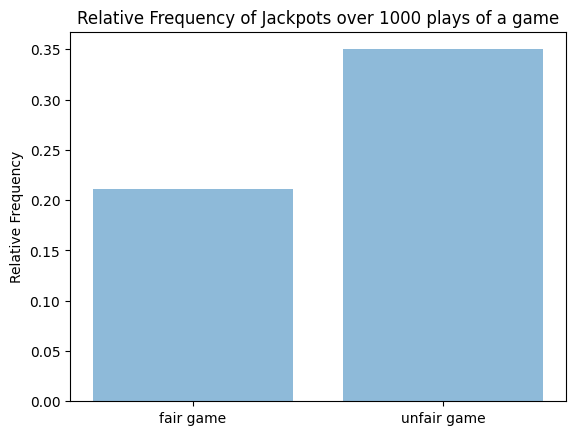

In [1]:
# Code blocks with output
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Scenario 1: A 2-headed coin

#Create coin objects and change weights for unfair coins.
fair_coin_1 = Die(np.array(['H','T']))
fair_coin_2 = Die(np.array(['H','T']))
fair_coin_3 = Die(np.array(['H','T']))

fair_coin_4 = Die(np.array(['H','T']))
unfair_coin_1 = Die(np.array(['H','T']))
unfair_coin_1.change_weight('H',5)
unfair_coin_2 = Die(np.array(['H','T']))
unfair_coin_2.change_weight('H',5)

#Create game objects and analyze
fair_game = Game([fair_coin_1,fair_coin_2, fair_coin_3])
fair_game.play(1000)
fair_game.show(form='wide')

fair_game_analyze = Analyzer(fair_game)
fair_game_relative_freq = fair_game_analyze.jackpot()/1000

unfair_game = Game([unfair_coin_1,unfair_coin_2,fair_coin_4])
unfair_game.play(1000)
unfair_game.show(form = 'wide')

unfair_game_analyze = Analyzer(unfair_game)
unfair_game_relative_freq = unfair_game_analyze.jackpot()/1000

objects = ('fair game', 'unfair game')
y_pos = np.arange(len(objects))
performance = [fair_game_relative_freq, unfair_game_relative_freq]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Jackpots over 1000 plays of a game')

plt.show()


## Scenario 2

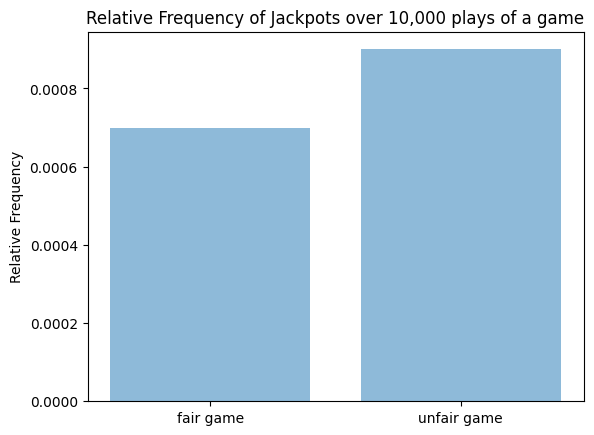

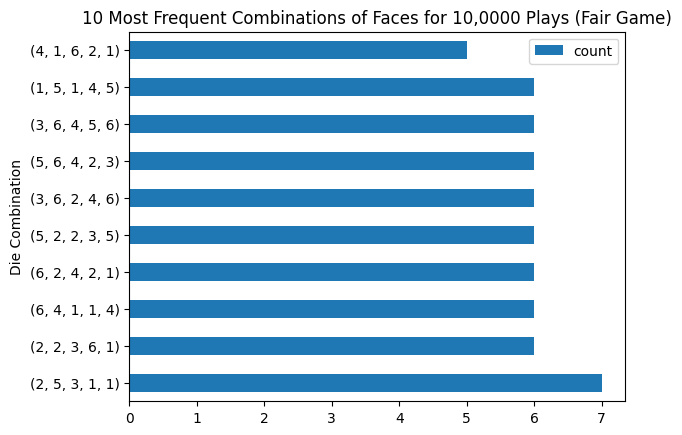

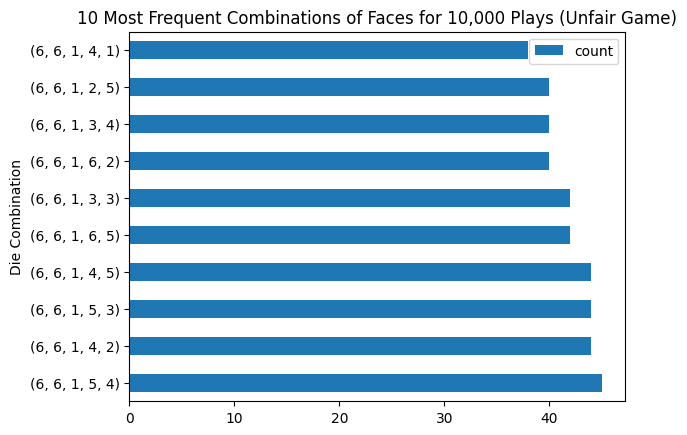

In [2]:
# Code blocks with output
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Scenario 2: A 6-sided die

#Create die objects and change weights for unfair die.
fair_die_1 = Die(np.array(['1','2','3','4','5','6']))
fair_die_2 = Die(np.array(['1','2','3','4','5','6']))
fair_die_3 = Die(np.array(['1','2','3','4','5','6']))
fair_die_4 = Die(np.array(['1','2','3','4','5','6']))
fair_die_5 = Die(np.array(['1','2','3','4','5','6']))
fair_die_6 = Die(np.array(['1','2','3','4','5','6']))
fair_die_7 = Die(np.array(['1','2','3','4','5','6']))

unfair_die_type1_1 = Die(np.array(['1','2','3','4','5','6']))
unfair_die_type1_1.change_weight('6',5)
unfair_die_type1_2 = Die(np.array(['1','2','3','4','5','6']))
unfair_die_type1_2.change_weight('6',5)
unfair_die_type2_1 = Die(np.array(['1','2','3','4','5','6']))
unfair_die_type2_1.change_weight('1',5)

#Create game objects and analyze objects
fair_game = Game([fair_die_1,fair_die_2, fair_die_3, fair_die_4, fair_die_5])
fair_game.play(10000)
fair_game.show(form='wide')

unfair_game = Game([unfair_die_type1_1, unfair_die_type1_2, unfair_die_type2_1, fair_die_6, fair_die_7])
unfair_game.play(10000)
unfair_game.show(form='wide')

fair_game_analyze = Analyzer(fair_game)
fair_game_analyze.combo()
fair_game_relative_freq = fair_game_analyze.jackpot()/10000

unfair_game_analyze = Analyzer(unfair_game)
unfair_game_analyze.combo()
unfair_game_relative_freq = unfair_game_analyze.jackpot()/10000

objects = ('fair game', 'unfair game')
y_pos = np.arange(len(objects))
performance = [fair_game_relative_freq, unfair_game_relative_freq]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Relative Frequency')
plt.title('Relative Frequency of Jackpots over 10,000 plays of a game')

plt.show()

combo_df_fair = fair_game_analyze.combo_results_index.iloc[0:10]
combo_df_fair.plot.barh()
plt.ylabel('Die Combination')
plt.title('10 Most Frequent Combinations of Faces for 10,0000 Plays (Fair Game)')
plt.show()

combo_df_unfair = unfair_game_analyze.combo_results_index.iloc[0:10]
combo_df_unfair.plot.barh()
plt.ylabel('Die Combination')
plt.title('10 Most Frequent Combinations of Faces for 10,000 Plays (Unfair Game)')
plt.show()


## Scenario 3

In [7]:
# Code blocks with output
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Scenario 3: Letters of the Roman Alpha

#Create die object

letters_die_1 = Die(np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S'
                           ,'T','U','V','W','X','Y','Z']))
letters_die_1.change_weight('A',8.4966)
letters_die_1.change_weight('B',2.0720)
letters_die_1.change_weight('C',4.5388)
letters_die_1.change_weight('D',3.3844)
letters_die_1.change_weight('E',11.1607)
letters_die_1.change_weight('F',1.8121)
letters_die_1.change_weight('G',2.4705)
letters_die_1.change_weight('H',3.0034)
letters_die_1.change_weight('I',7.5448)
letters_die_1.change_weight('J',0.1965)
letters_die_1.change_weight('K',1.1016)
letters_die_1.change_weight('L',5.4893)
letters_die_1.change_weight('M',3.0129)
letters_die_1.change_weight('N',6.6544)
letters_die_1.change_weight('O',7.1635)
letters_die_1.change_weight('P',3.1671)
letters_die_1.change_weight('Q',0.1962)
letters_die_1.change_weight('R',7.5809)
letters_die_1.change_weight('S',5.7351)
letters_die_1.change_weight('T',6.9509)
letters_die_1.change_weight('U',3.6308)
letters_die_1.change_weight('V',1.0074)
letters_die_1.change_weight('W',1.2899)
letters_die_1.change_weight('X',0.2902)
letters_die_1.change_weight('Y',1.7779)
letters_die_1.change_weight('Z',0.2722)

letters_die_2 = letters_die_1
letters_die_3 = letters_die_1
letters_die_4 = letters_die_1
letters_die_5 = letters_die_1

#Create game object and analyze object
letters_game = Game([letters_die_1,letters_die_2,letters_die_3,letters_die_4,letters_die_5])
letters_game.play(1000)
letters_game.show(form='wide')

letters_game_analyze = Analyzer(letters_game)
letters_game_analyze.combo()

pd.set_option('display.max_rows', None)
print(letters_game_analyze.combo_results_sort)

#Based on a review of the full output in a text editor, I counted 1 row that looked like an actual 5 letter English word.
#In terms of relative frequency, based on this output, actual 5 letter English words have frequency 1/1000 or .001 in this scenario.

    Die 1 Die 2 Die 3 Die 4 Die 5  count
622     N     T     I     P     T      2
914     T     R     R     C     U      2
0       A     A     B     A     C      1
669     O     N     C     S     C      1
657     O     I     K     M     I      1
658     O     I     N     V     R      1
659     O     I     V     L     E      1
660     O     L     A     A     I      1
661     O     L     E     G     A      1
662     O     L     L     U     E      1
663     O     L     P     N     F      1
664     O     L     S     P     A      1
665     O     M     D     M     A      1
666     O     M     U     R     R      1
667     O     M     V     C     O      1
668     O     N     C     G     I      1
670     O     N     N     M     M      1
655     O     H     N     L     A      1
671     O     N     R     W     V      1
672     O     N     T     L     C      1
673     O     O     O     A     A      1
674     O     O     O     S     C      1
675     O     O     O     T     S      1
676     O     O 

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [14]:
%cd
%cd Monte-Carlo-Simulator 
%ls

C:\Users\victo
C:\Users\victo\Monte-Carlo-Simulator
 Volume in drive C is Windows-SSD
 Volume Serial Number is D686-193D

 Directory of C:\Users\victo\Monte-Carlo-Simulator

04/30/2023  02:41 PM    <DIR>          .
04/29/2023  08:31 PM    <DIR>          ..
04/29/2023  08:27 PM             3,238 .gitignore
04/30/2023  03:01 PM           240,643 FinalProjectSubmissionTemplate.ipynb
04/29/2023  08:27 PM             1,084 LICENSE
04/30/2023  01:22 PM    <DIR>          montecarlo_dir
04/29/2023  06:53 PM             2,591 montecarlo_results.txt
04/29/2023  06:55 PM            13,255 montecarlo_test.py
04/30/2023  03:01 PM             2,797 README.md
04/30/2023  01:26 PM               237 setup.py
               7 File(s)        263,845 bytes
               3 Dir(s)  241,242,378,240 bytes free


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [10]:
# Installation commands


SyntaxError: invalid syntax (589513760.py, line 2)